In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

In [8]:
class AudioSpec():
    def __init__(self, file):
        self.wf = wave.open(file, 'rb')
    
    def extract(self):
        self.data = self.wf.readframes(-1)
        self.data = np.fromstring(self.data, 'Int16')
#         if self.wf.getnchannels() == 2:
#             print "111"
#             sys.exit(0)
        print self.data
    
    def plot_spec(self):
        plt.figure(1)
        plt.title('Waveform in Time Domain')
        plt.plot(self.data)
        plt.show()

[-1818 -2868 -2065 ..., -1428  -975 -1044]


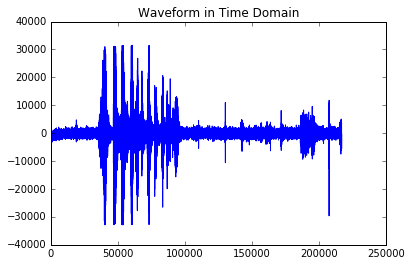

In [9]:
if __name__ == '__main__':
    f = AudioSpec("output.wav")
    f.extract()
    f.plot_spec()